In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
xlsx = pd.ExcelFile('FracStats_JobList_Summer2017.xlsx')
df_stats = xlsx.parse('FracStats')
df_production = xlsx.parse('Production')

In [42]:
df_stats.head()

,Well,Formation,Basing,System,Fluid Type,Lateral [ft],TVD [ft],MD [ft],Stage [count],Screen Out,...,Phasing [deg],Perf Diameter [in],Perfs Open [count],Cluster Spacing [ft],Stage Spacing [ft],Perfs [area],Ball Size [in],Rate at Shift [bpm],Stage Length [ft],Well Section
0,P2,Niobrara,Denver-Julesburg,Sliding Sleeve,Gel,7104.0,6648.0,14124.0,1.0,No,...,NaN,NaN,NaN,NaN,TS,NaN,1.095,9.6,TS,Toe
1,P2,Niobrara,Denver-Julesburg,Sliding Sleeve,Gel,7104.0,6648.0,14124.0,2.0,No,...,NaN,NaN,NaN,NaN,193,NaN,1.15,11.9,193.52,Toe
2,P2,Niobrara,Denver-Julesburg,Sliding Sleeve,Gel,7104.0,6648.0,14124.0,3.0,No,...,NaN,NaN,NaN,NaN,197,NaN,1.205,11.9,196.87,Toe
3,P2,Niobrara,Denver-Julesburg,Sliding Sleeve,Gel,7104.0,6648.0,14124.0,4.0,No,...,NaN,NaN,NaN,NaN,197,NaN,1.26,11.9,197,Toe
4,P2,Niobrara,Denver-Julesburg,Sliding Sleeve,Gel,7104.0,6648.0,14124.0,5.0,No,...,NaN,NaN,NaN,NaN,197,NaN,1.315,11.8,196.77,Toe


In [43]:
df_production.head()

,Well,Days On,Day Cum,Days Cum (Zero),Gas Montlhy Prod [mcf],Oil Montlhy Prod [bbl],Water Montlhy Prod [bbl],Total HD Montlhy Production [boe],Gas Daily Prod [mcf/day],Oil Daily Prod [bbl/day],...,Water Daily Prod [bbl/day],Gas Daily Prod [boe/day],Gas Cum [mcf],Gas Cum [boe],Oil Cum [bbl],Total HD Cum Production [mcfe],Total HD Cum Production [boe],Water Cum [bbl],Total Daily Production [boe/day],Total Cum Production [boe]
0,S3,19.0,19.0,0.0,34304.0,4067.0,NaN,9784.333333,1805.473684,214.052632,...,0.000000,300.912281,34304.0,5717.333333,4067.0,58706.0,9784.333333,NaN,514.964912,9784.333333
1,S3,31.0,50.0,31.0,54267.0,11096.0,102.0,20140.500000,1750.548387,357.935484,...,3.290323,291.758065,88571.0,1849.333333,15163.0,120843.0,17012.333333,102.0,652.983871,17114.333333
2,S3,31.0,81.0,62.0,58660.0,14525.0,2343.0,24301.666667,1892.258065,468.548387,...,75.580645,315.376344,147231.0,2420.833333,29688.0,145810.0,32108.833333,2445.0,859.505376,34553.833333
3,S3,29.0,110.0,91.0,60078.0,13718.0,1719.0,23731.000000,2071.655172,473.034483,...,59.275862,345.275862,207309.0,2286.333333,43406.0,142386.0,45692.333333,4164.0,877.586207,49856.333333
4,S3,31.0,141.0,122.0,66339.0,12281.0,1555.0,23337.500000,2139.967742,396.161290,...,50.161290,356.661290,273648.0,2046.833333,55687.0,140025.0,57733.833333,5719.0,802.983871,63452.833333


In [44]:
wells_w_stats = df_stats['Well'].unique()
print(len(wells_w_stats))
print(df_stats.shape)

38
(1103, 145)


38 wells with frac stats, 1103 stages. Since production is a potential target (response) variable, let's plot up time-series production for each well. We could potentially build a model to forecast production.

In [45]:
wells_w_production = df_production['Well '].unique()
print(len(wells_w_production))

23


38 wells with stats vs. 23 wells with production data. Let's start by analyzing wells in which both data sets are available by selecting the intersection.

In [46]:
complete_well_data = set(wells_w_stats).intersection(set(wells_w_production))
print(len(complete_well_data))

22


In [47]:
print(complete_well_data)

{'P11', 'D9', 'P6', 'S3', 'P10', 'P3', 'D5', 'S8', 'S5', 'P2', 'P9', 'D3', 'D2', 'P8', 'D10', 'D4', 'P4', 'S6', 'P7', 'D1', 'P5', 'P1'}


Let's narrow our FracStats and Production data frames donwn to these wells and start exploring.

In [48]:
df1_stats = df_stats[df_stats['Well'].isin(complete_well_data)]
df1_production = df_production[df_production['Well '].isin(complete_well_data)]

In [49]:
df1_stats.head(15)

,Well,Formation,Basing,System,Fluid Type,Lateral [ft],TVD [ft],MD [ft],Stage [count],Screen Out,...,Phasing [deg],Perf Diameter [in],Perfs Open [count],Cluster Spacing [ft],Stage Spacing [ft],Perfs [area],Ball Size [in],Rate at Shift [bpm],Stage Length [ft],Well Section
0,P2,Niobrara,Denver-Julesburg,Sliding Sleeve,Gel,7104.0,6648.0,14124.0,1.0,No,...,NaN,NaN,NaN,NaN,TS,NaN,1.095,9.6,TS,Toe
1,P2,Niobrara,Denver-Julesburg,Sliding Sleeve,Gel,7104.0,6648.0,14124.0,2.0,No,...,NaN,NaN,NaN,NaN,193,NaN,1.15,11.9,193.52,Toe
2,P2,Niobrara,Denver-Julesburg,Sliding Sleeve,Gel,7104.0,6648.0,14124.0,3.0,No,...,NaN,NaN,NaN,NaN,197,NaN,1.205,11.9,196.87,Toe
3,P2,Niobrara,Denver-Julesburg,Sliding Sleeve,Gel,7104.0,6648.0,14124.0,4.0,No,...,NaN,NaN,NaN,NaN,197,NaN,1.26,11.9,197,Toe
4,P2,Niobrara,Denver-Julesburg,Sliding Sleeve,Gel,7104.0,6648.0,14124.0,5.0,No,...,NaN,NaN,NaN,NaN,197,NaN,1.315,11.8,196.77,Toe
5,P2,Niobrara,Denver-Julesburg,Sliding Sleeve,Gel,7104.0,6648.0,14124.0,6.0,No,...,NaN,NaN,NaN,NaN,195,NaN,1.37,11.9,195.08,Toe
6,P2,Niobrara,Denver-Julesburg,Sliding Sleeve,Gel,7104.0,6648.0,14124.0,7.0,No,...,NaN,NaN,NaN,NaN,195,NaN,1.425,11.8,195.07,Toe
7,P2,Niobrara,Denver-Julesburg,Sliding Sleeve,Gel,7104.0,6648.0,14124.0,8.0,No,...,NaN,NaN,NaN,NaN,198,NaN,1.48,12.3,198.2,Toe
8,P2,Niobrara,Denver-Julesburg,Sliding Sleeve,Gel,7104.0,6648.0,14124.0,9.0,No,...,NaN,NaN,NaN,NaN,197,NaN,1.535,12.2,196.72,Toe
9,P2,Niobrara,Denver-Julesburg,Sliding Sleeve,Gel,7104.0,6648.0,14124.0,10.0,No,...,NaN,NaN,NaN,NaN,196,NaN,1.59,12.7,196.04,Toe


In [50]:
df_stats['Screen Out'].value_counts()

No         1024
Cut          28
Skipped      12
Yes           6
Name: Screen Out, dtype: int64

Let's code anything but Screen Oout equal to 'No' as unsuccessful stage.

In [51]:
stage_success_dict = {'No': 1,
                      'Cut': 0,
                      'Skipped': 0,
                      'Yes': 0}

df_stats['Stage Success'] = df_stats['Screen Out'].map(stage_success_dict)

In [52]:
unsucessful = df_stats[df_stats['Stage Success'] == 0]

In [53]:
unsucessful.head()

,Well,Formation,Basing,System,Fluid Type,Lateral [ft],TVD [ft],MD [ft],Stage [count],Screen Out,...,Perf Diameter [in],Perfs Open [count],Cluster Spacing [ft],Stage Spacing [ft],Perfs [area],Ball Size [in],Rate at Shift [bpm],Stage Length [ft],Well Section,Stage Success
210,P8,Codell,Denver-Julesburg,Plug and Perf,Gel,NaN,6777.0,13872.0,1.0,Yes,...,NaN,NaN,NaN,TS,NaN,NaN,NaN,TS,Toe,0.0
211,P8,Codell,Denver-Julesburg,Plug and Perf,Gel,NaN,6777.0,13872.0,2.0,Skipped,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Toe,0.0
212,P8,Codell,Denver-Julesburg,Plug and Perf,Gel,NaN,6777.0,13872.0,3.0,Skipped,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Toe,0.0
213,P8,Codell,Denver-Julesburg,Plug and Perf,Gel,NaN,6777.0,13872.0,4.0,Skipped,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Toe,0.0
214,P8,Codell,Denver-Julesburg,Plug and Perf,Gel,NaN,6777.0,13872.0,5.0,Skipped,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Toe,0.0


In [54]:
print("{} unsuccessful stages across {} wells.".format(unsucessful.shape[0], len(unsucessful['Well'].unique())))

46 unsuccessful stages across 11 wells.


If we look at all the stages accross these 11 wells, can we determine factors that contributed to screen outs? Let's start by throwing logistic regression at a few of the features.

In [55]:
df_stats.columns

Index(['Well', 'Formation', 'Basing', 'System', 'Fluid Type', 'Lateral [ft]',
       'TVD [ft]', 'MD [ft]', 'Stage [count]', 'Screen Out',
       ...
       'Perf Diameter [in]', 'Perfs Open [count]', 'Cluster Spacing [ft]',
       'Stage Spacing [ft]', 'Perfs  [area]', 'Ball Size [in]',
       'Rate at Shift [bpm]', 'Stage Length [ft]', 'Well Section',
       'Stage Success'],
      dtype='object', length=146)

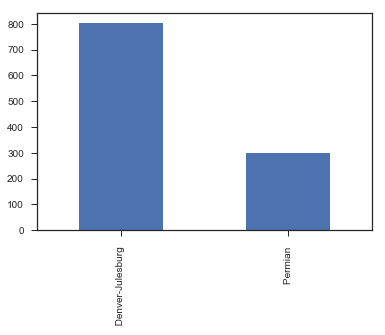

In [56]:
df_stats['Basing'].value_counts().plot.bar();

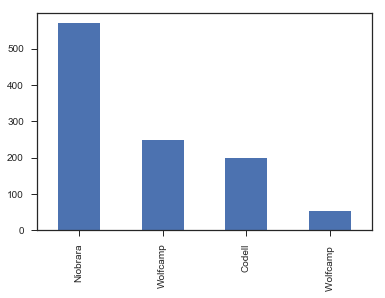

In [57]:
df_stats['Formation'].value_counts().plot.bar();

https://stackoverflow.com/questions/14885895/color-by-column-values-in-matplotlib

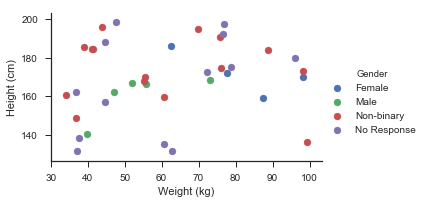

In [58]:
import seaborn
seaborn.set(style='ticks')

np.random.seed(0)
N = 37
_genders= ['Female', 'Male', 'Non-binary', 'No Response']
df = pd.DataFrame({
    'Height (cm)': np.random.uniform(low=130, high=200, size=N),
    'Weight (kg)': np.random.uniform(low=30, high=100, size=N),
    'Gender': np.random.choice(_genders, size=N)
})

fg = seaborn.FacetGrid(data=df, hue='Gender', hue_order=_genders, aspect=1.61)
fg.map(plt.scatter, 'Weight (kg)', 'Height (cm)').add_legend()

In [59]:
df_stats.columns

Index(['Well', 'Formation', 'Basing', 'System', 'Fluid Type', 'Lateral [ft]',
       'TVD [ft]', 'MD [ft]', 'Stage [count]', 'Screen Out',
       ...
       'Perf Diameter [in]', 'Perfs Open [count]', 'Cluster Spacing [ft]',
       'Stage Spacing [ft]', 'Perfs  [area]', 'Ball Size [in]',
       'Rate at Shift [bpm]', 'Stage Length [ft]', 'Well Section',
       'Stage Success'],
      dtype='object', length=146)

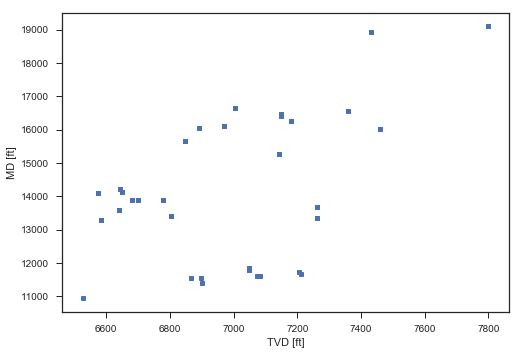

In [60]:
cmap = df_stats['Stage Success'].map({0:'b', 1:'r'})
df_stats.plot(kind='scatter', x='TVD [ft]', y='MD [ft]')

https://stackoverflow.com/questions/22943894/class-labels-in-pandas-scattermatrix

In [61]:
select_cols = ['Screen Out', 'Avg TP [psi]', 'Avg Rate [bpm]', 'Clean Volume [bbl]', 'Total Proppant [lbs].1', 'Avg Prop Conc [ppa]', 'Max Prop Conc [ppa]', 'Stage Success']
others = ['MD [ft]', 'TVD [ft]', 'Formation']

df_stats_sub = df_stats[select_cols]
df_stats_sub.head()

,Screen Out,Avg TP [psi],Avg Rate [bpm],Clean Volume [bbl],Total Proppant [lbs].1,Avg Prop Conc [ppa],Max Prop Conc [ppa],Stage Success
0,No,6886.0,22.3,3482.0,170433.0,0.75,3.62,1.0
1,No,7316.0,25.6,3413.0,219282.0,1.57,3.57,1.0
2,No,7189.0,26.6,3314.0,210937.0,1.57,4.09,1.0
3,No,7443.0,29.9,3350.0,215075.0,1.56,4.06,1.0
4,No,7185.0,29.8,3328.0,209826.0,1.51,3.99,1.0


/Users/ky/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/ky/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/ky/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/ky/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


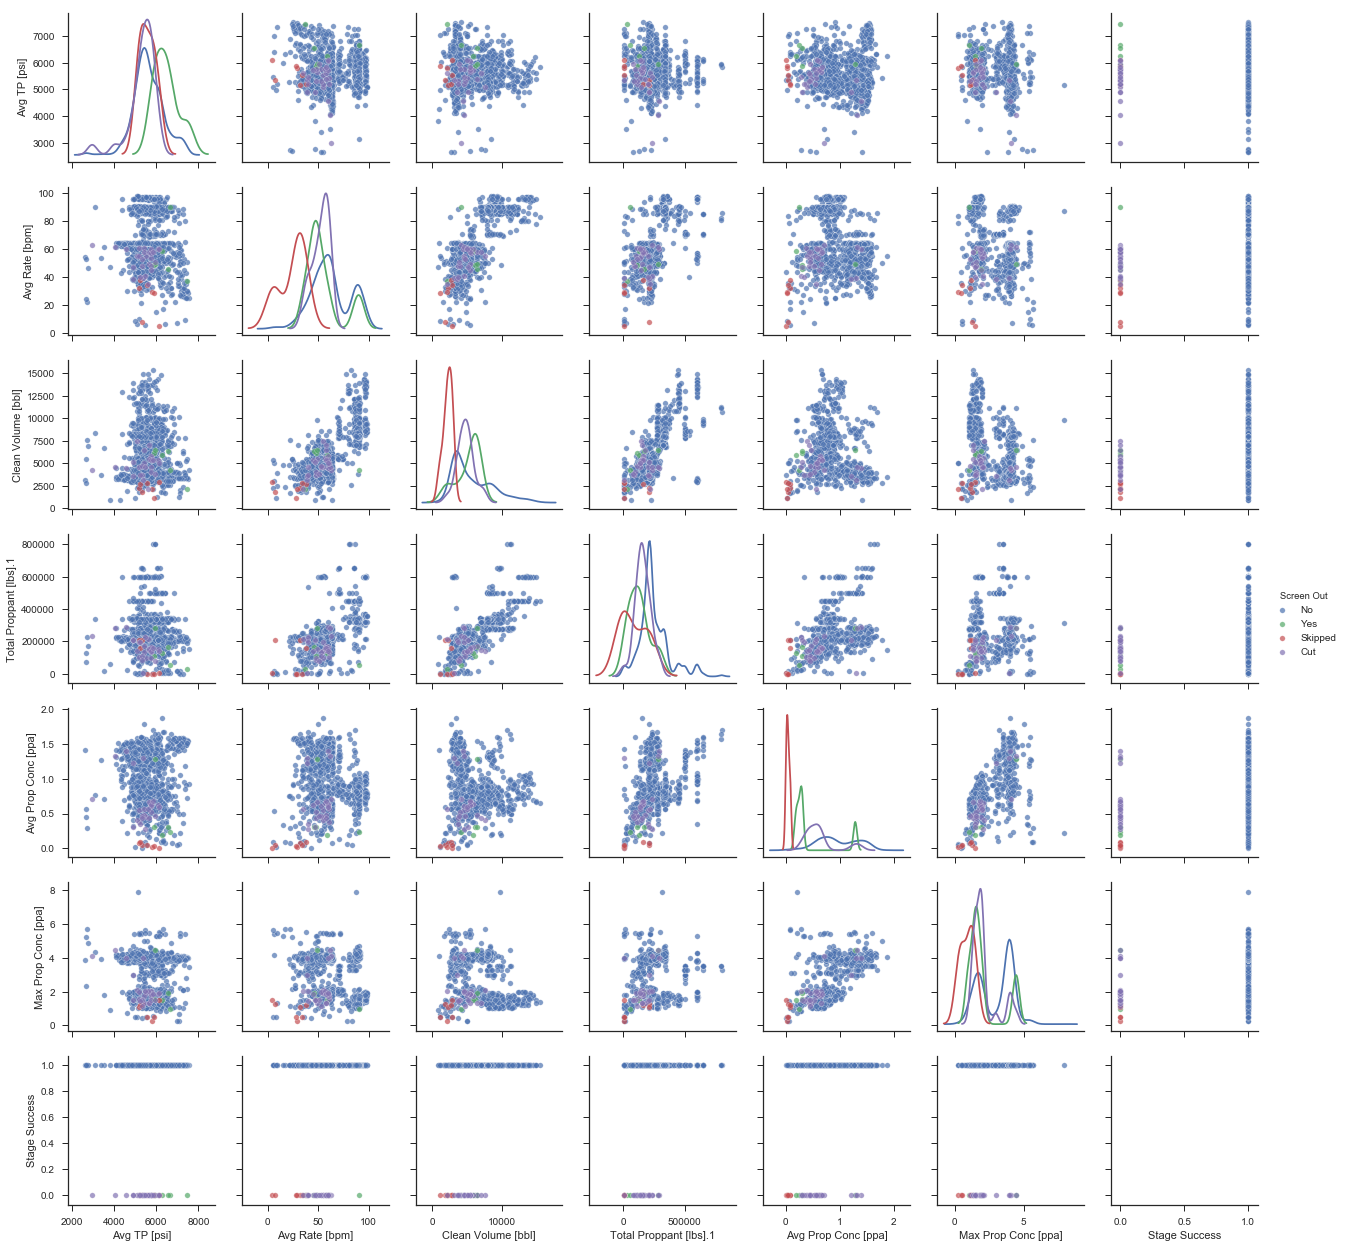

In [62]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df_stats_sub, hue="Screen Out", diag_kind='kde', plot_kws={'s': 30, 'alpha': 0.7});

What does a successful treament in each formation look like?

In [63]:
success = df_stats[df_stats['Stage Success'] == 1]

In [64]:
success['Formation'].unique()

array(['Niobrara', 'Codell', 'Wolfcamp', 'Wolfcamp '], dtype=object)

Let's rename 'Wofcamp ' to 'Wolfcamp'.

In [65]:
success['Formation'].replace({'Wolfcamp ': 'Wolfcamp'}, inplace=True)

/Users/ky/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [66]:
successful_nio = success[df_stats['Formation'] == 'Niobrara']
successful_codell = success[df_stats['Formation'] == 'Codell']
successful_wolfcamp = success[df_stats['Formation'] == 'Wolfcamp']

/Users/ky/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/ky/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/ky/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
print("{} sucessful Niobrara stages.".format(successful_nio.shape[0]))
print("{} sucessful Codell stages.".format(successful_codell.shape[0]))
print("{} sucessful Wolfcamp stages.".format(successful_wolfcamp.shape[0]))

542 sucessful Niobrara stages.
182 sucessful Codell stages.
248 sucessful Wolfcamp stages.


/Users/ky/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/ky/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


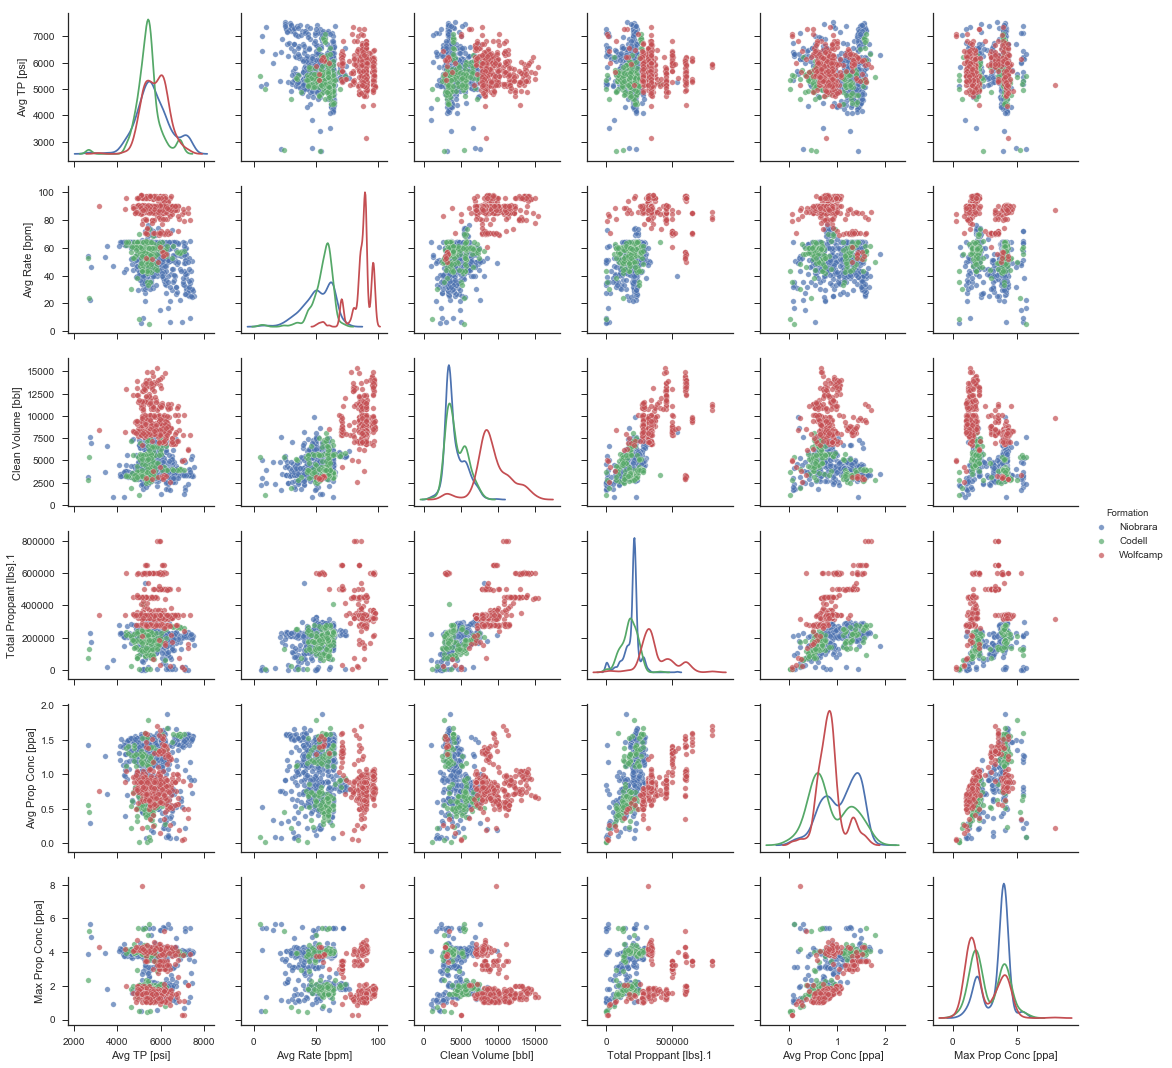

In [68]:
import seaborn as sns
sns.set(style="ticks")

select_cols = ['Formation', 'Avg TP [psi]', 'Avg Rate [bpm]', 'Clean Volume [bbl]',
               'Total Proppant [lbs].1', 'Avg Prop Conc [ppa]', 'Max Prop Conc [ppa]']

sns.pairplot(success[select_cols], hue="Formation", diag_kind="kde", plot_kws={"s": 30, "alpha": 0.7});

/Users/ky/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1514: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/ky/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1515: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


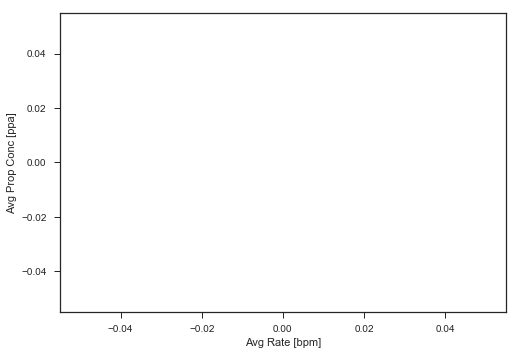

In [69]:
niobrara = success.loc[success.Formation == "Niobrara"]
codell = success.loc[success.Formation == "Codell"]
ax = sns.kdeplot(niobrara['Avg Rate [bpm]'], niobrara['Avg Prop Conc [ppa]'], cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(codell['Avg Rate [bpm]'], codell['Avg Prop Conc [ppa]'], cmap="Blues", shade=True, shade_lowest=False)

ValueError: could not convert string to float: 'Wolfcamp'

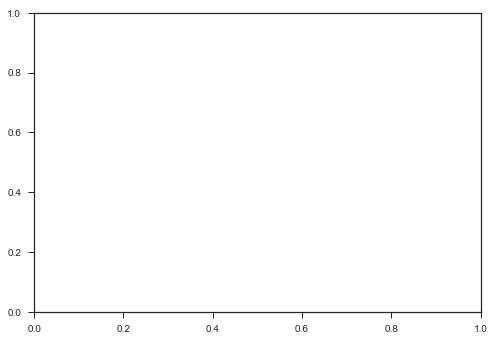

In [32]:
numeric_cols = ['Formation', 'Avg TP [psi]', 'Avg Rate [bpm]', 'Clean Volume [bbl]',
               'Total Proppant [lbs].1', 'Avg Prop Conc [ppa]', 'Max Prop Conc [ppa]', 
               'Stage Success']

sns.kdeplot(success[numeric_cols]);